In [1]:
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import IPython.html.widgets as widgets
from IPython.html.widgets import interact, fixed

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
colors = matplotlib.colors.cnames.values()

In [3]:
db = "/notebooks/moldev-data/db/db.csv"

In [4]:
data = pd.read_csv(db)

/usr/local/lib/python2.7/dist-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (9,34,36,70) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [5]:
plates = data['Plate ID'].unique()

In [6]:
plate0data = data[data['Plate ID'] == plates[0]]

In [7]:
params = data.columns.tolist()

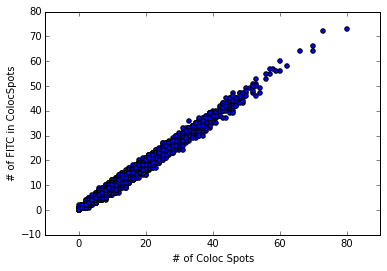

In [8]:
plate0data.plot(kind='scatter', x = params[0], y = params[1])

In [9]:
def plot_scatter(data, x, y, alpha):
    conditions = data['Condition'].unique().tolist()
    my_colors = colors[:len(conditions)]
    new_data = \
        pd.merge(data, pd.DataFrame({"Condition": conditions, "Color": my_colors}), on = 'Condition')
    new_data.plot(kind = 'scatter', x = x, y = y, c = new_data['Color'], linewidth = 0, alpha = alpha)

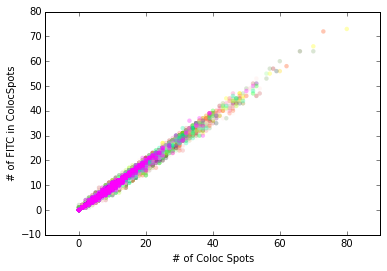

In [10]:
interact(
    plot_scatter,
    data = fixed(plate0data),
    x = widgets.Select(options = params, value = params[0]),
    y = widgets.Select(options = params, value = params[1]),
    alpha = widgets.FloatSlider(min = 0, max = 0.3, step = 0.02, value = 1));